In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import sympy

import matplotlib.pyplot as plt

In [2]:
N = pd.read_table("equ.txt", header=None)

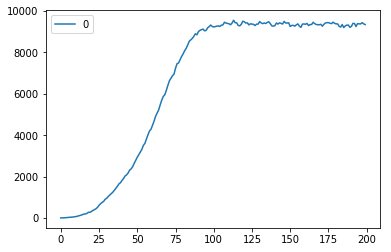

In [3]:
N.plot()

$$A+\frac{K-A}{1+Qe^{-Bt}}$$

In [19]:
def func(x, a, k, q, b):
    return a + k-a/((1+q*np.exp(-b*x)))

In [20]:
Nr = np.array([sympy.N(i[0]) for i in N.values],dtype='float64')
params, params_covariance = curve_fit(func, N.index, Nr,
                                               p0=[0, 10000, 1, 1])

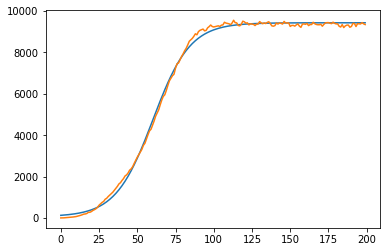

In [21]:
N_fit = []
for i in N.index:
    N_fit.append(func(i, params[0], params[1],  params[2], params[3]))
plt.plot(N.index, N_fit)
plt.plot(N.index, N)

In [22]:
# residual sum of squares
ss_res = np.sum((Nr - N_fit) ** 2)

# total sum of squares
ss_tot = np.sum((Nr - np.mean(Nr)) ** 2)

# r-squared
r2 = 1 - (ss_res / ss_tot)

In [23]:
r2

0.9984746330723396

$$A+\frac{K-A}{1+Qe^{-Bt}}$$

In [25]:
#A, K, Q, B
params

array([-9.36639502e+03,  9.43369062e+03,  1.41393188e+02,  8.22320488e-02])

In [24]:
params[1]

9433.690621037911